<a href="https://colab.research.google.com/github/tirthmagnus/Practical-datascience/blob/main/Final_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd  # For data manipulation and analysis
import numpy as np   # For numerical computing
import matplotlib.pyplot as plt  # For data visualization
import seaborn as sns  # For statistical data visualization


In [ ]:
# Read the Excel file
data = pd.read_excel("/content/=Data.xlsx")

# Display the first few rows of the DataFrame to verify that the data has been read correctly
print(data.head())

   TransactionID       Date      Time  CustomerID  Age Gender Location  \
0              1 2020-12-24  07:27:59         441   27  Other  City_15   
1              2 2022-11-18  14:36:39         340   43   Male  City_13   
2              3 2019-12-26  20:23:50          31   25  Other   City_7   
3              4 2018-11-13  23:08:08          39   64   Male  City_20   
4              5 2020-12-13  04:38:08         344   26  Other  City_10   

   StoreID  OnlineOrderFlag  ProductID  ...  PaymentType PromotionApplied  \
0      NaN             True        106  ...  Credit Card            False   
1      NaN             True        816  ...  Credit Card             True   
2     92.0            False        508  ...  Credit Card            False   
3    100.0            False        710  ...   Debit Card            False   
4     90.0            False        687  ...         Cash            False   

   DiscountAmount  GiftWrap  ShippingMethod DeliveryTime  Weather  \
0             0.0     F

In [ ]:
# Display the shape of the data
print("Shape of the data:", data.shape)

Shape of the data: (10000, 25)


In [ ]:
# Check the data types of variables
print("Data types of variables:")
print(data.dtypes)


Data types of variables:
TransactionID                    int64
Date                    datetime64[ns]
Time                            object
CustomerID                       int64
Age                              int64
Gender                          object
Location                        object
StoreID                        float64
OnlineOrderFlag                   bool
ProductID                        int64
ProductName                     object
Category                        object
Quantity                         int64
UnitPrice                      float64
TotalPrice                     float64
PaymentType                     object
PromotionApplied                  bool
DiscountAmount                 float64
GiftWrap                          bool
ShippingMethod                  object
DeliveryTime                   float64
Weather                         object
Event                           object
CustomerSatisfaction             int64
ReturnFlag                        bool


In [ ]:
# Check the total null values in each column
null_values_per_column = data.isnull().sum()
print("Total null values in each column:")
print(null_values_per_column)


Total null values in each column:
TransactionID              0
Date                       0
Time                       0
CustomerID                 0
Age                        0
Gender                     0
Location                   0
StoreID                 5418
OnlineOrderFlag            0
ProductID                  0
ProductName                0
Category                   0
Quantity                   0
UnitPrice                  0
TotalPrice                 0
PaymentType                0
PromotionApplied           0
DiscountAmount             0
GiftWrap                   0
ShippingMethod          4582
DeliveryTime            4582
Weather                    0
Event                      0
CustomerSatisfaction       0
ReturnFlag                 0
dtype: int64


In [ ]:
# Create a boolean mask to identify rows with negative quantity
negative_quantity_mask = data['Quantity'] < 0

# Filter the DataFrame to remove rows with negative quantity
data = data[~negative_quantity_mask]


In [ ]:
# Define the age ranges
age_bins = [18, 30, 45, 60, 90]

# Define the labels for the age ranges
age_labels = ['18-30', '31-45', '46-60', '61-90']

# Create a new column 'AgeRange' with the age ranges
data['AgeRange'] = pd.cut(data['Age'], bins=age_bins, labels=age_labels, right=False)


In [ ]:
# Print the first few rows of the DataFrame after modification
print(data.head())


   TransactionID       Date      Time  CustomerID  Age Gender Location  \
0              1 2020-12-24  07:27:59         441   27  Other  City_15   
1              2 2022-11-18  14:36:39         340   43   Male  City_13   
2              3 2019-12-26  20:23:50          31   25  Other   City_7   
3              4 2018-11-13  23:08:08          39   64   Male  City_20   
4              5 2020-12-13  04:38:08         344   26  Other  City_10   

   StoreID  OnlineOrderFlag  ProductID  ... PromotionApplied DiscountAmount  \
0      NaN             True        106  ...            False            0.0   
1      NaN             True        816  ...             True            0.0   
2     92.0            False        508  ...            False            0.0   
3    100.0            False        710  ...            False            0.0   
4     90.0            False        687  ...            False            0.0   

   GiftWrap  ShippingMethod  DeliveryTime Weather             Event  \
0     Fal

In [ ]:
#EDA

<ipython-input-12-8dd97347fac9>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = data.corr()


Correlation Matrix:
                      TransactionID  CustomerID       Age   StoreID  \
TransactionID              1.000000   -0.007571  0.008768 -0.011731   
CustomerID                -0.007571    1.000000  0.017789 -0.010283   
Age                        0.008768    0.017789  1.000000  0.012182   
StoreID                   -0.011731   -0.010283  0.012182  1.000000   
OnlineOrderFlag           -0.023223   -0.014559 -0.008221       NaN   
ProductID                  0.002999   -0.004926 -0.006054 -0.003712   
Quantity                  -0.000184    0.001759 -0.004013  0.014903   
UnitPrice                 -0.006574   -0.011330  0.011062  0.001710   
TotalPrice                -0.005039   -0.011569  0.006367  0.010790   
PromotionApplied          -0.014425    0.002274 -0.010139  0.023580   
DiscountAmount             0.000231   -0.004180  0.001299 -0.007931   
GiftWrap                   0.008637   -0.013224 -0.006564  0.007440   
DeliveryTime              -0.007384   -0.010216 -0.002052

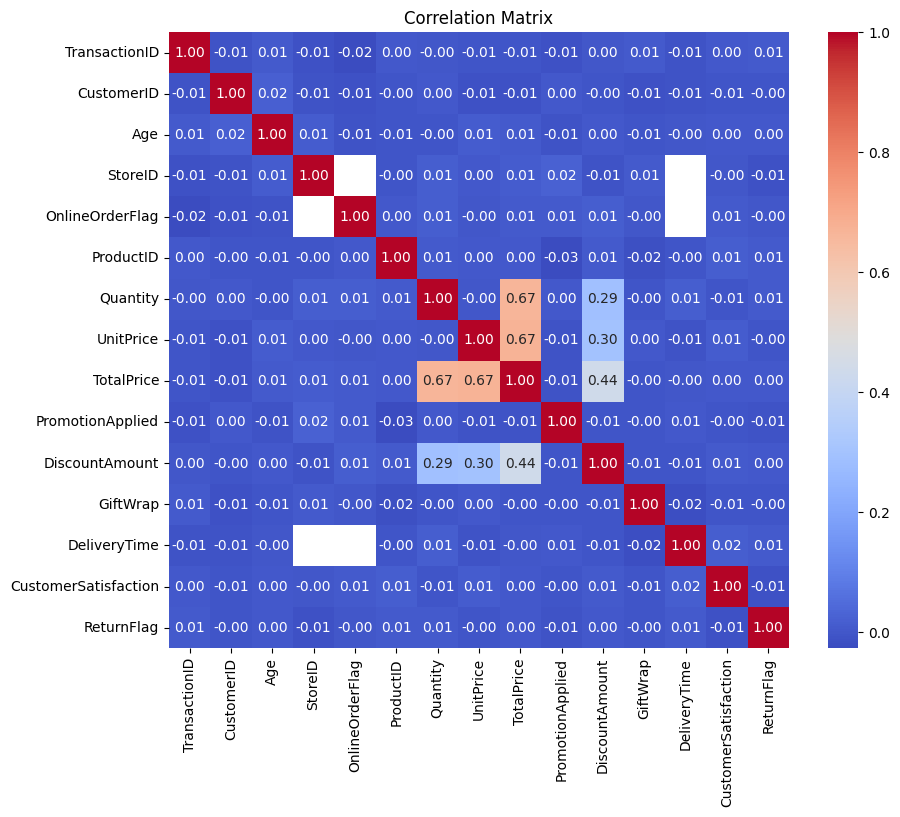

In [ ]:
# Calculate the correlation matrix
correlation_matrix = data.corr()

# Display the correlation matrix
print("Correlation Matrix:")
print(correlation_matrix)

# Plot the correlation matrix as a heatmap
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()


In [ ]:
# Print the correlation matrix in numerical format
print("Correlation Matrix (Numerical Format):")
print(correlation_matrix)


Correlation Matrix (Numerical Format):
                      TransactionID  CustomerID       Age   StoreID  \
TransactionID              1.000000   -0.007571  0.008768 -0.011731   
CustomerID                -0.007571    1.000000  0.017789 -0.010283   
Age                        0.008768    0.017789  1.000000  0.012182   
StoreID                   -0.011731   -0.010283  0.012182  1.000000   
OnlineOrderFlag           -0.023223   -0.014559 -0.008221       NaN   
ProductID                  0.002999   -0.004926 -0.006054 -0.003712   
Quantity                  -0.000184    0.001759 -0.004013  0.014903   
UnitPrice                 -0.006574   -0.011330  0.011062  0.001710   
TotalPrice                -0.005039   -0.011569  0.006367  0.010790   
PromotionApplied          -0.014425    0.002274 -0.010139  0.023580   
DiscountAmount             0.000231   -0.004180  0.001299 -0.007931   
GiftWrap                   0.008637   -0.013224 -0.006564  0.007440   
DeliveryTime              -0.007384   

In [ ]:
# Columns to remove
columns_to_remove = [ 'CustomerID', 'StoreID', 'OnlineOrderFlag', 'DeliveryTime']

# Create a new DataFrame with columns removed
new_data = data.drop(columns=columns_to_remove, axis=1)

# Display the new DataFrame
new_data.head()


,TransactionID,Date,Time,Age,Gender,Location,ProductID,ProductName,Category,Quantity,...,PaymentType,PromotionApplied,DiscountAmount,GiftWrap,ShippingMethod,Weather,Event,CustomerSatisfaction,ReturnFlag,AgeRange
0,1,2020-12-24,07:27:59,27,Other,City_15,106,Toys_Product,Toys,5,...,Credit Card,False,0.0,False,Standard,Snowy,None,5,False,18-30
1,2,2022-11-18,14:36:39,43,Male,City_13,816,Clothing_Product,Clothing,1,...,Credit Card,True,0.0,True,Express,Sunny,None,2,True,31-45
2,3,2019-12-26,20:23:50,25,Other,City_7,508,Clothing_Product,Clothing,2,...,Credit Card,False,0.0,False,NaN,Rainy,Christmas Market,4,False,18-30
3,4,2018-11-13,23:08:08,64,Male,City_20,710,Toys_Product,Toys,5,...,Debit Card,False,0.0,True,NaN,Rainy,None,1,True,61-90
4,5,2020-12-13,04:38:08,26,Other,City_10,687,Toys_Product,Toys,3,...,Cash,False,0.0,True,NaN,Sunny,Christmas Market,4,False,18-30


In [ ]:
# Remove the 'Time' column from the DataFrame
new_data.drop(columns=['Time'], inplace=True)


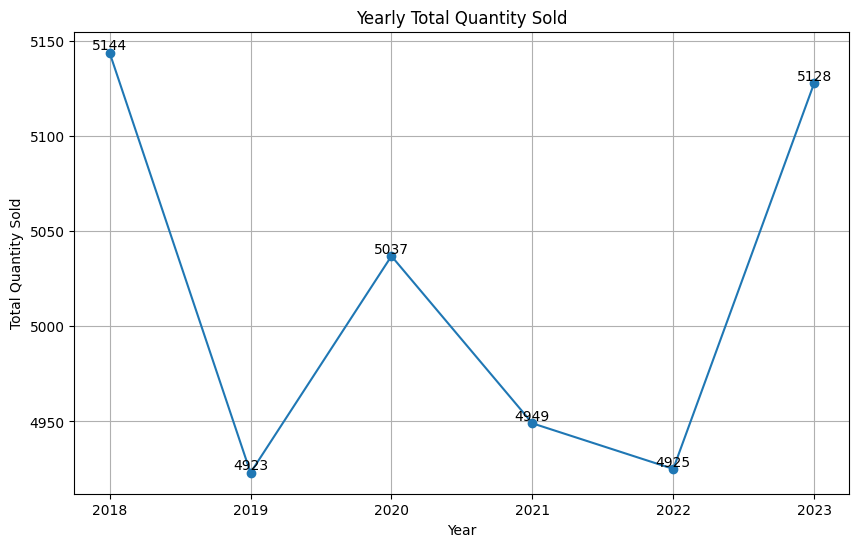

In [ ]:
# Extract year from the 'Date' column
new_data['Year'] = pd.to_datetime(new_data['Date']).dt.year

# Group by year and sum up the quantities sold
yearly_quantity = new_data.groupby('Year')['Quantity'].sum()

# Plot the line graph
plt.figure(figsize=(10, 6))
plt.plot(yearly_quantity.index, yearly_quantity.values, marker='o', linestyle='-')
plt.title('Yearly Total Quantity Sold')
plt.xlabel('Year')
plt.ylabel('Total Quantity Sold')
plt.grid(True)
plt.xticks(yearly_quantity.index)  # Set x-ticks to be the years
# Add data labels
for i, txt in enumerate(yearly_quantity.values):
    plt.text(yearly_quantity.index[i], txt, str(txt), ha='center', va='bottom')

plt.show()


In [ ]:
# Calculate the average of the DiscountAmount column
avg_discount = new_data['DiscountAmount'].mean()

print("Average Discount Amount:", avg_discount)


Average Discount Amount: 6.95454486265


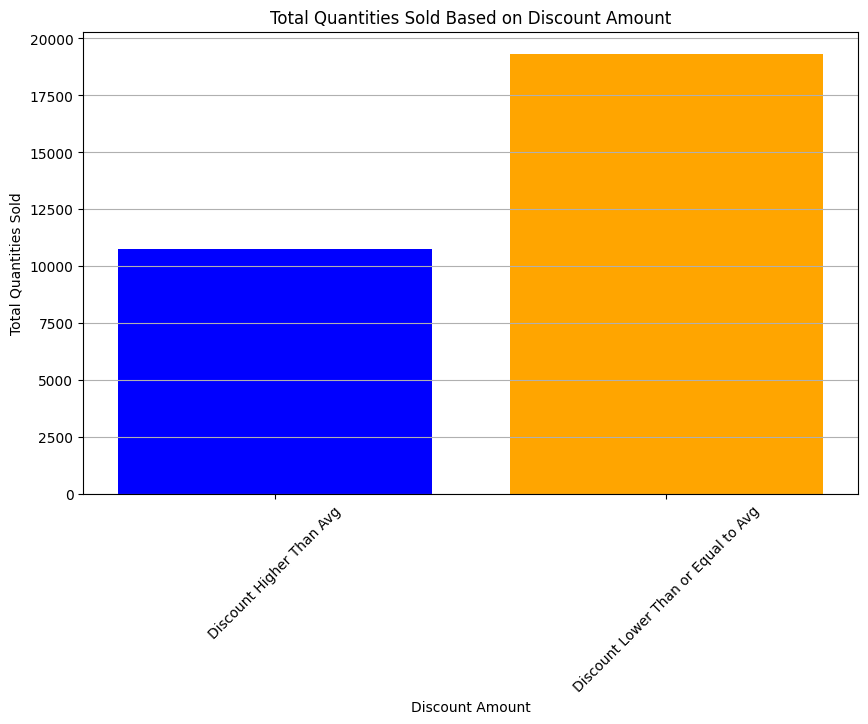

In [ ]:
import matplotlib.pyplot as plt

# Calculate the average discount amount
avg_discount = new_data['DiscountAmount'].mean()

# Filter dataset for instances with discount amount higher than the average
discount_higher_than_avg = new_data[new_data['DiscountAmount'] > avg_discount]

# Filter dataset for instances with discount amount lower than or equal to the average
discount_lower_than_avg = new_data[new_data['DiscountAmount'] <= avg_discount]

# Calculate total quantities sold for both cases
total_quantities_higher = discount_higher_than_avg['Quantity'].sum()
total_quantities_lower = discount_lower_than_avg['Quantity'].sum()

# Plot total quantities sold
plt.figure(figsize=(10, 6))
plt.bar(['Discount Higher Than Avg', 'Discount Lower Than or Equal to Avg'], [total_quantities_higher, total_quantities_lower], color=['blue', 'orange'])
plt.title('Total Quantities Sold Based on Discount Amount')
plt.xlabel('Discount Amount')
plt.ylabel('Total Quantities Sold')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()


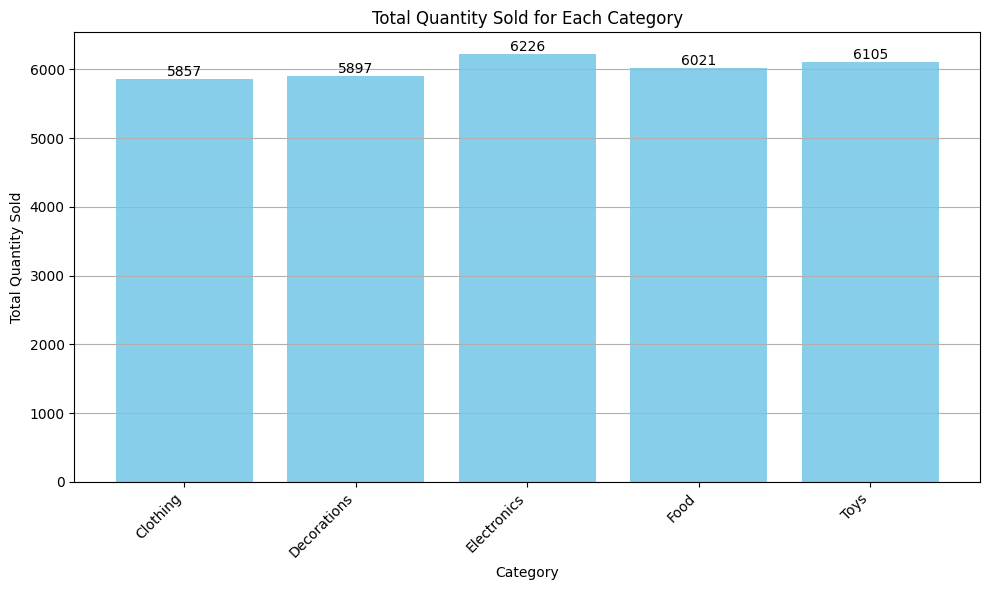

In [ ]:
# Aggregate quantity sold for each category
quantity_category = data.groupby('Category')['Quantity'].sum().reset_index()

# Plot bar graph
plt.figure(figsize=(10, 6))
plt.bar(quantity_category['Category'], quantity_category['Quantity'], color='skyblue')
plt.xlabel('Category')
plt.ylabel('Total Quantity Sold')
plt.title('Total Quantity Sold for Each Category')
plt.xticks(rotation=45, ha='right')  # Rotate category labels for better visibility
plt.grid(axis='y')

# Add data labels
for i in range(len(quantity_category)):
    plt.text(quantity_category.index[i], quantity_category['Quantity'][i],
             str(quantity_category['Quantity'][i]), ha='center', va='bottom')

plt.tight_layout()
plt.show()

In [ ]:
import pandas as pd

# Assuming 'Date' is a datetime format
new_data['Month'] = pd.to_datetime(new_data['Date']).dt.month
new_data['DayofWeek'] = pd.to_datetime(new_data['Date']).dt.dayofweek
# Consider adding a 'IsHoliday' feature based on holiday calendars


In [ ]:
new_data

,TransactionID,Date,Age,Gender,Location,ProductID,ProductName,Category,Quantity,UnitPrice,...,GiftWrap,ShippingMethod,Weather,Event,CustomerSatisfaction,ReturnFlag,AgeRange,Year,Month,DayofWeek
0,1,2020-12-24,27,Other,City_15,106,Toys_Product,Toys,5,96.786255,...,False,Standard,Snowy,None,5,False,18-30,2020,12,3
1,2,2022-11-18,43,Male,City_13,816,Clothing_Product,Clothing,1,95.279579,...,True,Express,Sunny,None,2,True,31-45,2022,11,4
2,3,2019-12-26,25,Other,City_7,508,Clothing_Product,Clothing,2,52.371645,...,False,NaN,Rainy,Christmas Market,4,False,18-30,2019,12,3
3,4,2018-11-13,64,Male,City_20,710,Toys_Product,Toys,5,63.647293,...,True,NaN,Rainy,None,1,True,61-90,2018,11,1
4,5,2020-12-13,26,Other,City_10,687,Toys_Product,Toys,3,57.384041,...,True,NaN,Sunny,Christmas Market,4,False,18-30,2020,12,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,2022-12-21,25,Other,City_10,54,Decorations_Product,Decorations,1,91.072121,...,True,Express,Sunny,Black Friday,4,False,18-30,2022,12,2
9996,9997,2022-11-24,46,Female,City_17,324,Electronics_Product,Electronics,1,41.538590,...,True,Express,Rainy,Black Friday,2,True,46-60,2022,11,3
9997,9998,2021-11-02,46,Female,City_13,892,Food_Product,Food,3,24.561093,...,True,NaN,Snowy,Black Friday,2,False,46-60,2021,11,1
9998,9999,2020-11-11,64,Other,City_8,237,Electronics_Product,Electronics,3,20.334764,...,True,Express,Sunny,Christmas Market,1,False,61-90,2020,11,2


In [ ]:
new_data.drop('ShippingMethod', axis=1, inplace=True)

In [ ]:
new_data.shape

(10000, 23)

In [ ]:
new_data.columns


Index(['TransactionID', 'Date', 'Age', 'Gender', 'Location', 'ProductID',
       'ProductName', 'Category', 'Quantity', 'UnitPrice', 'TotalPrice',
       'PaymentType', 'PromotionApplied', 'DiscountAmount', 'GiftWrap',
       'Weather', 'Event', 'CustomerSatisfaction', 'ReturnFlag', 'AgeRange',
       'Year', 'Month', 'DayofWeek'],
      dtype='object')

In [ ]:
# Get the data types of each column
column_data_types = new_data.dtypes

# Print the data types
print(column_data_types)

TransactionID                    int64
Date                    datetime64[ns]
Age                              int64
Gender                          object
Location                        object
ProductID                        int64
ProductName                     object
Category                        object
Quantity                         int64
UnitPrice                      float64
TotalPrice                     float64
PaymentType                     object
PromotionApplied                  bool
DiscountAmount                 float64
GiftWrap                          bool
Weather                         object
Event                           object
CustomerSatisfaction             int64
ReturnFlag                        bool
AgeRange                      category
Year                             int64
Month                            int64
DayofWeek                        int64
dtype: object


In [ ]:
from sklearn.preprocessing import LabelEncoder
import pandas as pd

# Assuming 'df' is your DataFrame

# List of columns to label encode
columns_to_encode = ['Gender', 'Location', 'ProductName', 'Category', 'PaymentType', 'Weather', 'Event', 'AgeRange']

# Initialize a LabelEncoder for each column
encoders = {column: LabelEncoder() for column in columns_to_encode}

# Apply the encoders to each column
for column in columns_to_encode:
    new_data[column] = encoders[column].fit_transform(new_data[column])


In [ ]:
# Get the data types of each column
column_data_types = new_data.dtypes

# Print the data types
print(column_data_types)

TransactionID                    int64
Date                    datetime64[ns]
Age                              int64
Gender                           int64
Location                         int64
ProductID                        int64
ProductName                      int64
Category                         int64
Quantity                         int64
UnitPrice                      float64
TotalPrice                     float64
PaymentType                      int64
PromotionApplied                  bool
DiscountAmount                 float64
GiftWrap                          bool
Weather                          int64
Event                            int64
CustomerSatisfaction             int64
ReturnFlag                        bool
AgeRange                         int64
Year                             int64
Month                            int64
DayofWeek                        int64
dtype: object


In [ ]:
new_data

,TransactionID,Date,Age,Gender,Location,ProductID,ProductName,Category,Quantity,UnitPrice,...,DiscountAmount,GiftWrap,Weather,Event,CustomerSatisfaction,ReturnFlag,AgeRange,Year,Month,DayofWeek
0,1,2020-12-24,27,2,6,106,4,4,5,96.786255,...,0.000000,False,1,2,5,False,0,2020,12,3
1,2,2022-11-18,43,1,4,816,0,0,1,95.279579,...,0.000000,True,2,2,2,True,1,2022,11,4
2,3,2019-12-26,25,2,17,508,0,0,2,52.371645,...,0.000000,False,0,1,4,False,0,2019,12,3
3,4,2018-11-13,64,1,12,710,4,4,5,63.647293,...,0.000000,True,0,2,1,True,3,2018,11,1
4,5,2020-12-13,26,2,1,687,4,4,3,57.384041,...,0.000000,True,2,1,4,False,0,2020,12,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,2022-12-21,25,2,1,54,1,1,1,91.072121,...,9.107212,True,2,0,4,False,0,2022,12,2
9996,9997,2022-11-24,46,0,8,324,2,2,1,41.538590,...,4.153859,True,0,0,2,True,2,2022,11,3
9997,9998,2021-11-02,46,0,4,892,3,3,3,24.561093,...,7.368328,True,1,0,2,False,2,2021,11,1
9998,9999,2020-11-11,64,2,18,237,2,2,3,20.334764,...,0.000000,True,2,1,1,False,3,2020,11,2


In [ ]:
new_data.drop('Age', axis=1, inplace=True)

In [ ]:


# Define the features by excluding the 'Quantity' column
X = new_data.drop('Quantity', axis=1)

# Define the target variable, which is 'Quantity'
y = new_data['Quantity']


In [ ]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
# Here, 80% of the data is used for training and 20% for testing.
# The 'random_state' parameter ensures reproducibility of your results.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Now you have:
# X_train: features for the training set
# X_test: features for the testing set
# y_train: target variable for the training set
# y_test: target variable for the testing set


In [ ]:
# Print the shapes of the training and testing sets
print("Training features shape:", X_train.shape)
print("Training target shape:", y_train.shape)
print("Testing features shape:", X_test.shape)


Training features shape: (8000, 21)
Training target shape: (8000,)
Testing features shape: (2000, 21)


In [ ]:
# Assuming 'df' is your DataFrame and it includes your features and maybe the target variable

# Convert boolean columns to int
bool_columns = ['PromotionApplied', 'GiftWrap', 'ReturnFlag']
for column in bool_columns:
    new_data[column] = new_data[column].astype(int)

# Ensure all data is numeric (optional step, depending on your model's needs)
# This step assumes all necessary datetime and categorical encoding has been performed
new_data = new_data.select_dtypes(include=['int64', 'float64'])

# If 'Quantity' is still in 'df' and is your target, you should separate it again
# y = df['Quantity']
# X = df.drop(['Quantity'], axis=1)  # Assuming 'Quantity' is the target and should be excluded

# Then you can proceed with the train-test split and model training as before


In [ ]:
pip install CatBoost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.5/98.5 MB 2.5 MB/s eta 0:00:00


In [ ]:
from catboost import CatBoostRegressor

# Initialize the model
model = CatBoostRegressor(verbose=False)  # Set verbose to True if you want to see training progress

# Train the model on your training data
model.fit(X_train, y_train)

# Predict on your testing data
y_pred = model.predict(X_test)

# Evaluate the predictions
# Here you can use metrics like MSE, MAE, or R^2 as previously discussed


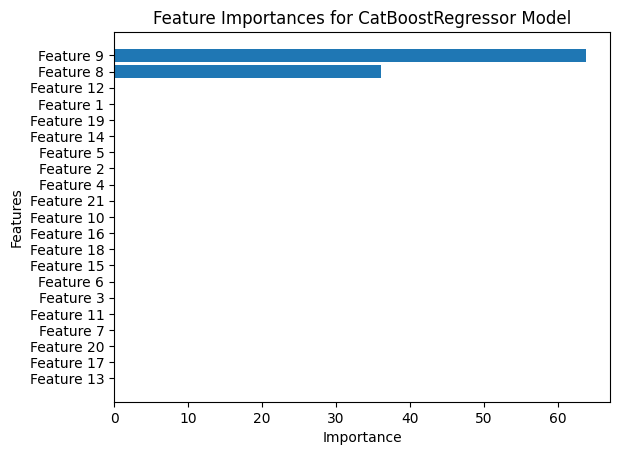

In [ ]:
# Get feature importances
feature_importances = model.get_feature_importance()
feature_names = [f'Feature {i+1}' for i in range(X.shape[1])]

# Sort the features by importance
sorted_indices = np.argsort(feature_importances)
sorted_feature_importances = feature_importances[sorted_indices]
sorted_feature_names = np.array(feature_names)[sorted_indices]

# Plot feature importances
plt.barh(sorted_feature_names, sorted_feature_importances)
plt.xlabel('Importance')
plt.ylabel('Features')
plt.title('Feature Importances for CatBoostRegressor Model')
plt.show()

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Assuming y_test is your actual values and y_pred are the predictions from the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R^2): {r2}")


Mean Absolute Error (MAE): 0.017934541256545443
Mean Squared Error (MSE): 0.0006831655045212466
R-squared (R^2): 0.9996490413433573


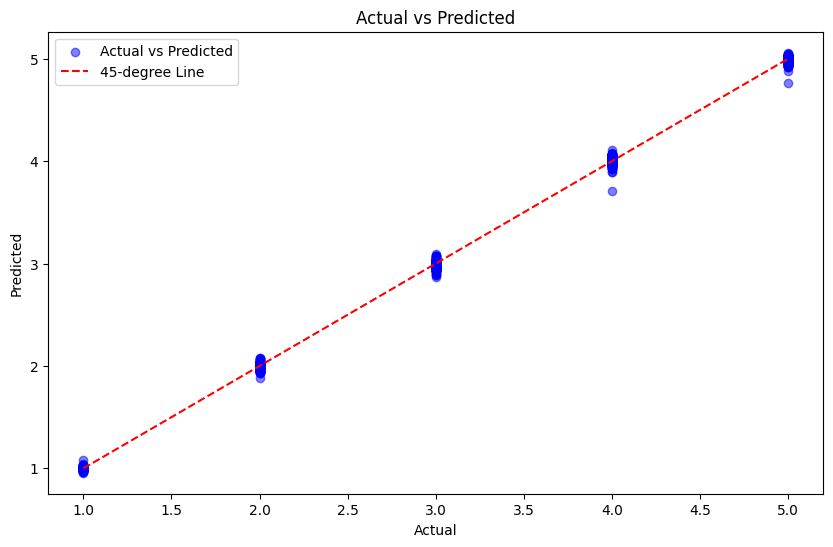

R-squared: 0.9996490413433573


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import r2_score

# Scatter plot with regression line
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5, color='blue', label='Actual vs Predicted')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label='45-degree Line')
plt.title('Actual vs Predicted')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.legend()
plt.show()

# Calculate R-squared
r_squared = r2_score(y_test, y_pred)
print("R-squared:", r_squared)


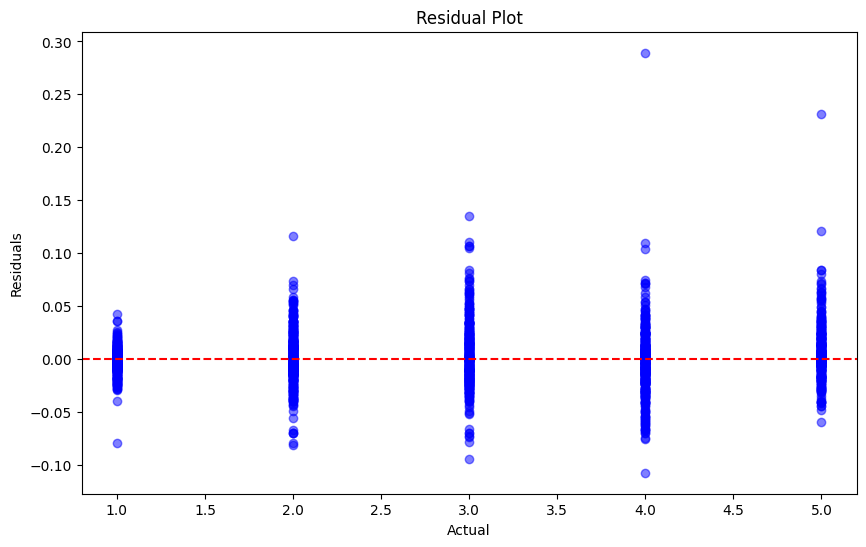

In [ ]:
# Residual plot
residuals = y_test - y_pred
plt.figure(figsize=(10, 6))
plt.scatter(y_test, residuals, alpha=0.5, color='blue')
plt.axhline(y=0, color='red', linestyle='--')
plt.title('Residual Plot')
plt.xlabel('Actual')
plt.ylabel('Residuals')
plt.show()


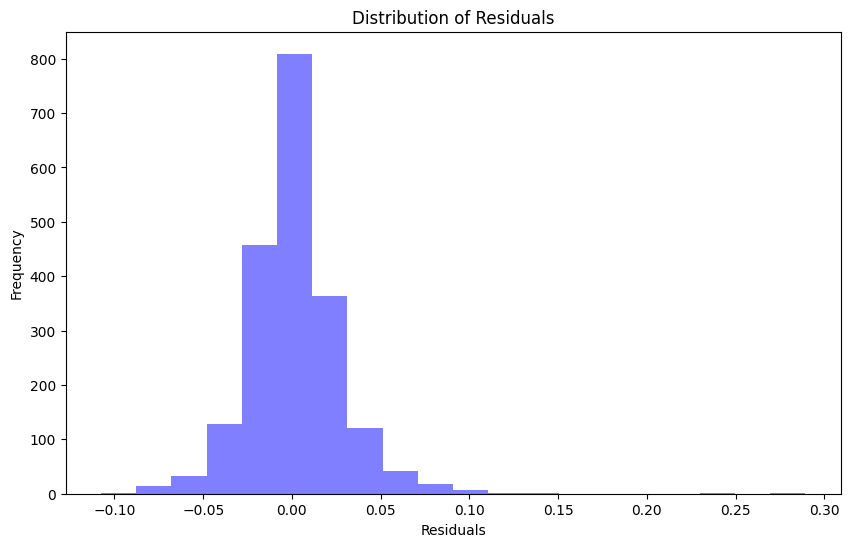

In [ ]:
# Distribution of residuals
plt.figure(figsize=(10, 6))
plt.hist(residuals, bins=20, color='blue', alpha=0.5)
plt.title('Distribution of Residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()


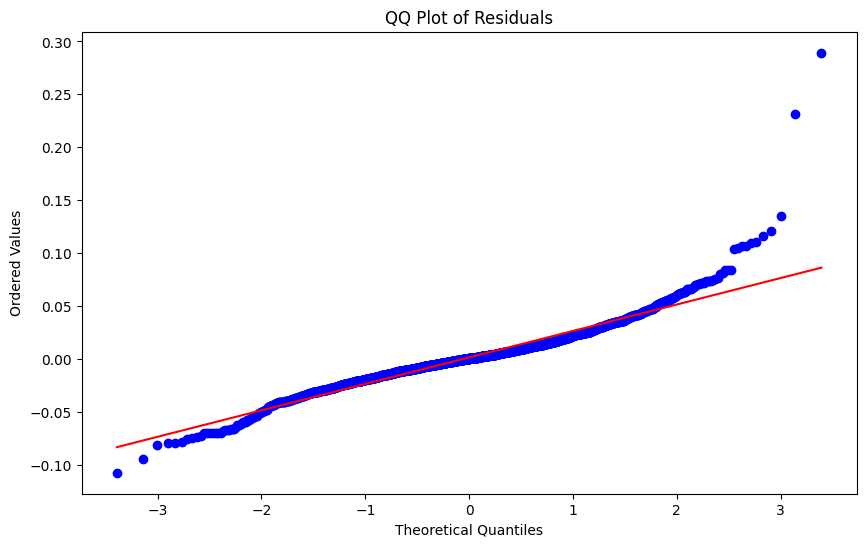

In [ ]:
import scipy.stats as stats

# QQ plot
plt.figure(figsize=(10, 6))
stats.probplot(residuals, dist="norm", plot=plt)
plt.title('QQ Plot of Residuals')
plt.xlabel('Theoretical Quantiles')
plt.ylabel('Ordered Values')
plt.show()


ValueError: num must be an integer with 1 <= num <= 9, not 10

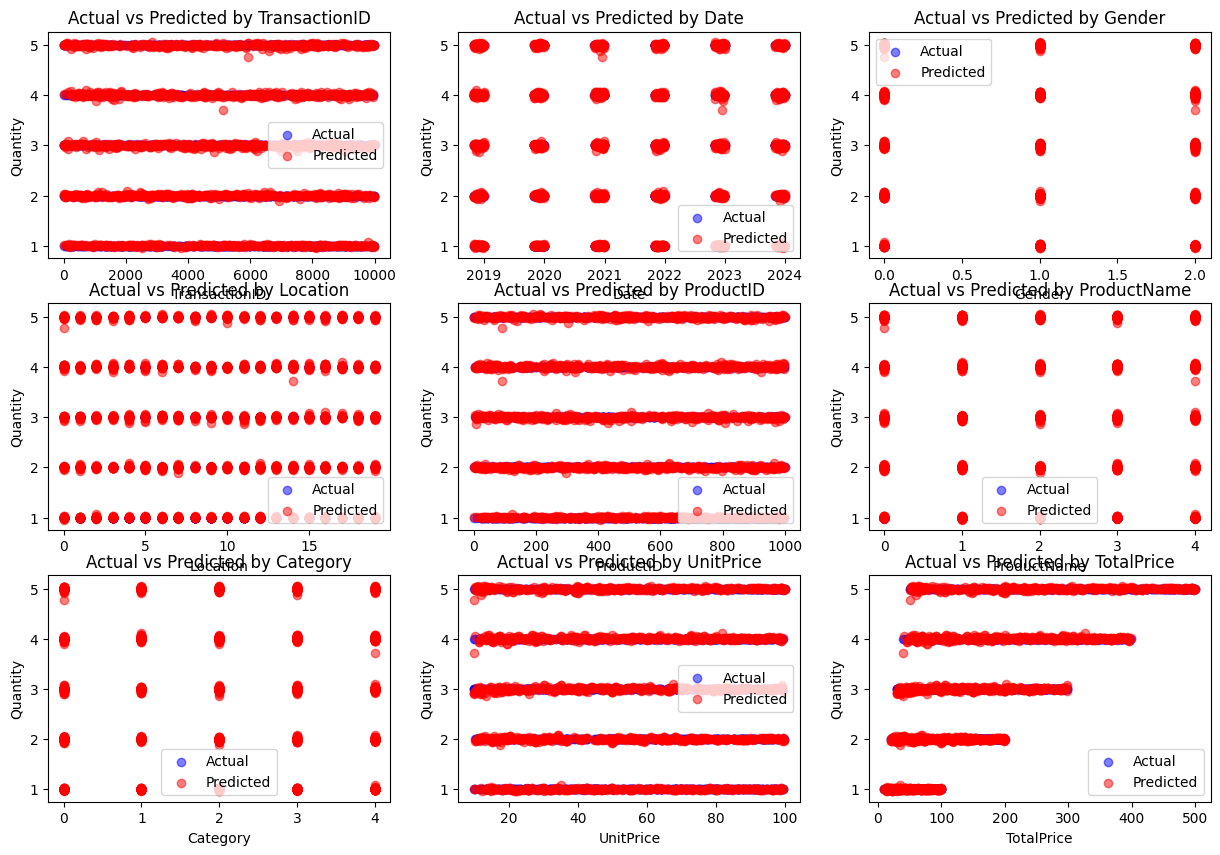

In [ ]:
# Assuming X_test contains features
feature_names = X_test.columns

plt.figure(figsize=(15, 10))
for i, feature in enumerate(feature_names):
    plt.subplot(3, 3, i+1)
    plt.scatter(X_test[feature], y_test, alpha=0.5, color='blue', label='Actual')
    plt.scatter(X_test[feature], y_pred, alpha=0.5, color='red', label='Predicted')
    plt.title(f'Actual vs Predicted by {feature}')
    plt.xlabel(feature)
    plt.ylabel('Quantity')
    plt.legend()
plt.tight_layout()
plt.show()


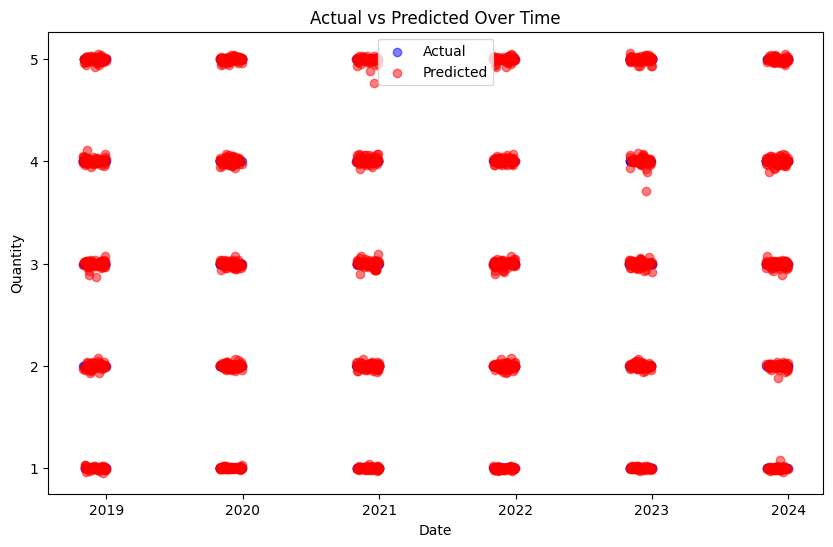

In [ ]:
# Assuming 'date' is a time-related variable in X_test
plt.figure(figsize=(10, 6))
plt.scatter(X_test['Date'], y_test, alpha=0.5, color='blue', label='Actual')
plt.scatter(X_test['Date'], y_pred, alpha=0.5, color='red', label='Predicted')
plt.title('Actual vs Predicted Over Time')
plt.xlabel('Date')
plt.ylabel('Quantity')
plt.legend()
plt.show()


SyntaxError: invalid syntax (<ipython-input-40-84715fdbc09a>, line 1)